### HIMPUNAN DATA

In [15]:
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql
#mysql+pymysql://<username>:<password>@<host>/<dbname>[?<options>]
sqlEngine=create_engine('mysql+pymysql://root:@127.0.0.1',pool_recycle=3600)

dbConnection = sqlEngine.connect()
df = pd.read_sql('SELECT * FROM djpegawai.prediksi_pegawai ', dbConnection)
pd.set_option('display.expand_frame_repr', False)
print(df)
dbConnection.close()

    id  YearsExperience    Salary
0    8              1.1   39343.0
1    9              1.3   46205.0
2   10              1.5   37731.0
3   11              2.0   43525.0
4   12              2.2   39891.0
5   13              2.9   56642.0
6   14              3.0   60150.0
7   15              3.2   54445.0
8   16              3.2   64445.0
9   17              3.7   57189.0
10  18              3.9   63218.0
11  19              4.0   55794.0
12  20              4.0   56957.0
13  21              4.1   57081.0
14  22              4.5   61111.0
15  23              4.9   67938.0
16  24              5.1   66029.0
17  25              5.3   83088.0
18  26              5.9   81363.0
19  27              6.0   93940.0
20  28              6.8   91738.0
21  29              7.1  101302.0


#### Data Cleaning
Menghapus data yang tidak digunakan dalam proses pembuatan machine learning.

In [4]:
df_clean = df.drop('id', axis=1)

In [6]:
x = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]

### PROSES DATA MINING & PENGETAHUAN

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

#### Prediction
Model machine learning ini menggunakan metode linear regression.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
persamaan = regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)
y_pred = regressor.predict(x_test)

[9087.03997976]
26611.29149797574


#### Visualisasi Data
Menampilkan visualisasi data menggunakan scatter diagram.

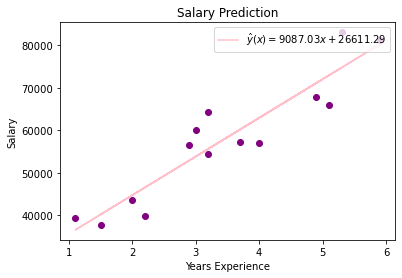

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="purple")
plt.plot(x_train, regressor.predict(x_train), color="pink")
plt.title("Salary Prediction")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(('$\hat{y}(x)=9087.03x+26611.29$',),loc='upper right')
plt.show()

In [10]:
import numpy as np
import scipy
from scipy import stats

In [11]:
def ANOVATAB(y,yhat,n,m):
    dfn=n
    dfd=m-n-1
    ybar=np.average(y)
    
    SSR = sum((yhat-ybar)**2)
    SSE = sum((y-yhat)**2)
    print (SSE)
    print(dfd)
    SST = sum((y-ybar)**2)
    MSR = SSR/dfn
    MSE = SSE/dfd
    
    Fs = MSR/MSE
    ks =1-scipy.stats.f.cdf(Fs,dfn,dfd)
    data_table = {
        'SS' : [SSR,SSE,SST],
        'df' : [dfn,dfd,m-1],
        'MS' : [MSR,MSE,'-'],
        'Fs' : [Fs,'-','-'],
        'pval' : [ks, '-', '-']
    }
    return pd.DataFrame(data_table)

Menampilkan tabel ANOVA untuk mendeskripsikan data yang dipakai.

In [12]:
n=1
m=len(y_pred)
print('TABEL ANOVA')
result=ANOVATAB(y_test,y_pred,n,m)
result

TABEL ANOVA
478777110.31719893
6


,SS,df,MS,Fs,pval
0,2.087941e+09,1,2087941040.83831,26.165926,0.002188
1,4.787771e+08,6,79796185.052866,-,-
2,3.071911e+09,7,-,-,-


#### Visualisasi Data
Menampilkan visualisasi data menggunakan scatter diagram.

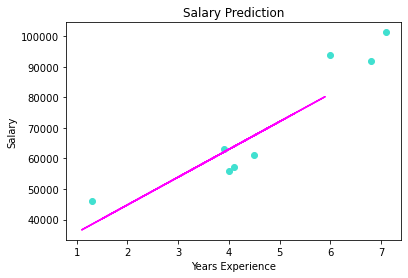

In [13]:
plt.scatter(x_test, y_test, color="turquoise")
plt.plot(x_train, regressor.predict(x_train), color="magenta")
plt.title("Salary Prediction")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

### Evaluasi Data

In [14]:
salary_pred = regressor.predict([[7]])
print("Gaji yang terprediksi pada pegawai yang bekerja sepanjang tahun tersebut adalah ",salary_pred)

Gaji yang terprediksi pada pegawai yang bekerja sepanjang tahun tersebut adalah  [90220.57135628]
